In [176]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [177]:
df = pd.read_csv("Crop_recommendation.csv")

In [178]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [179]:
df.shape


(2200, 8)

In [180]:
df.duplicated().sum()

np.int64(0)

In [181]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

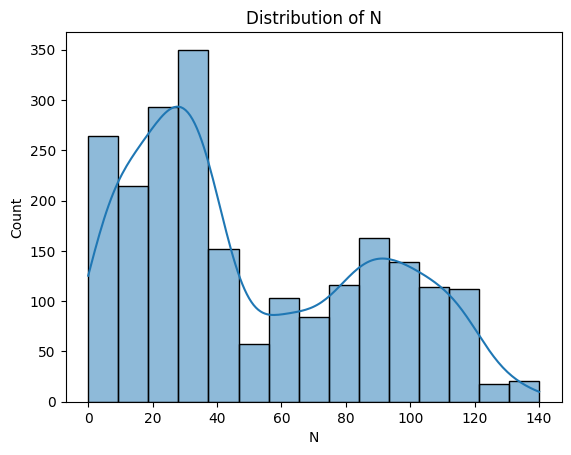

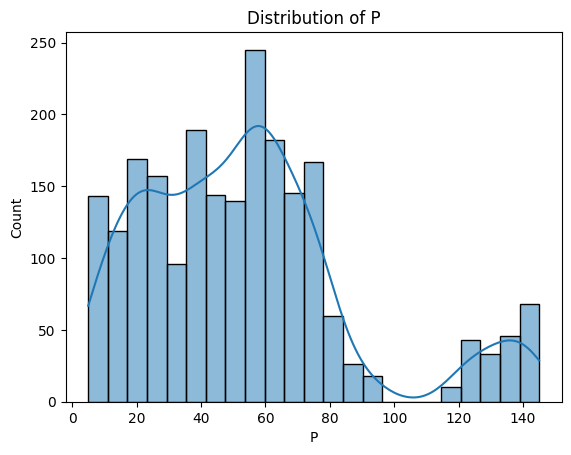

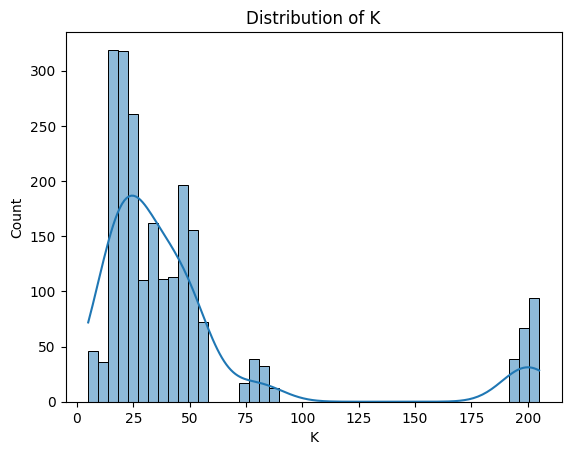

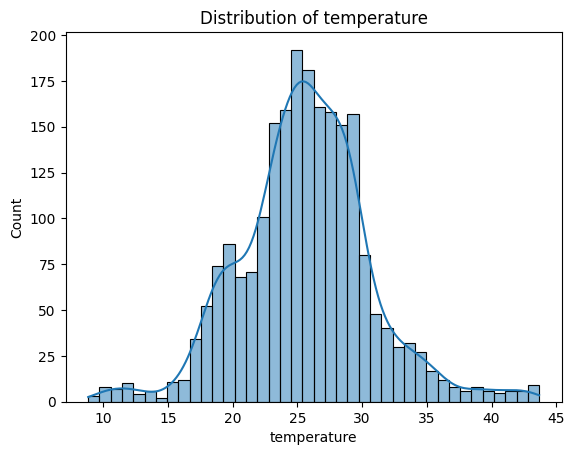

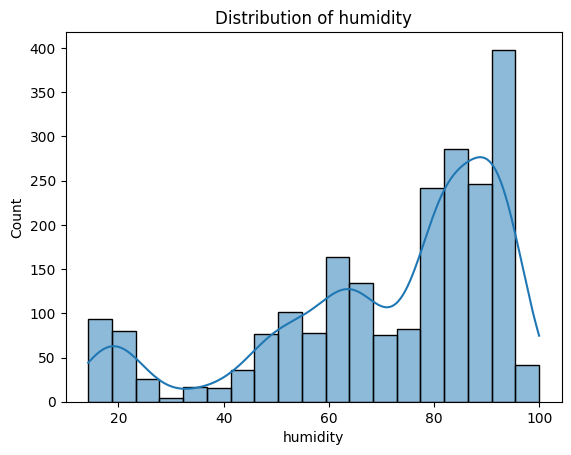

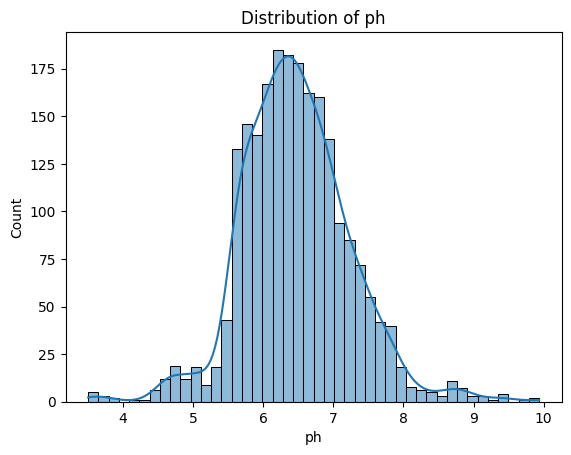

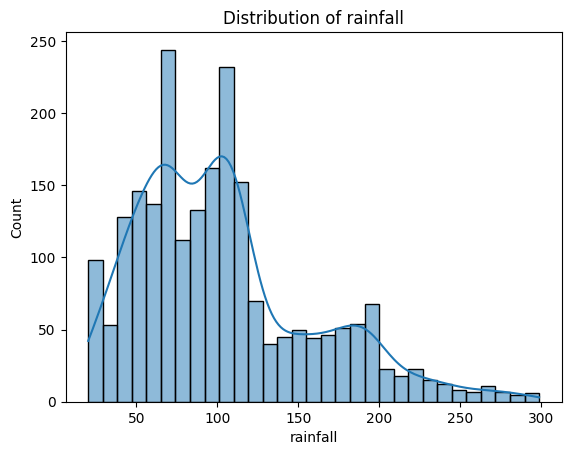

In [182]:
for col in df.drop('label', axis = 1).columns.tolist():
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()


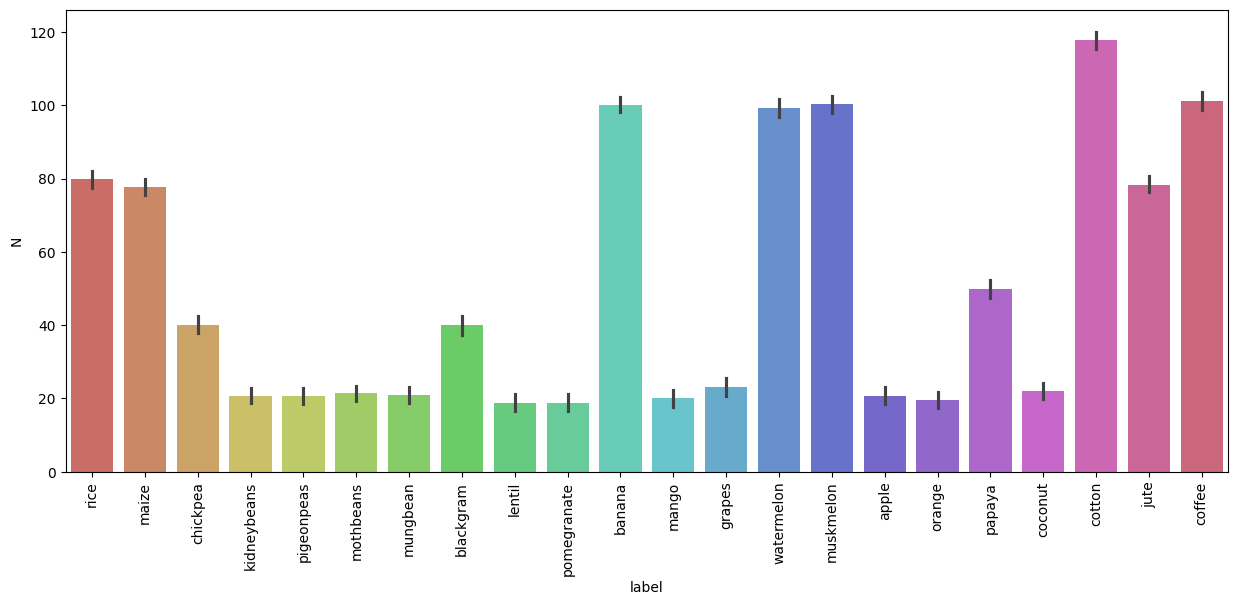

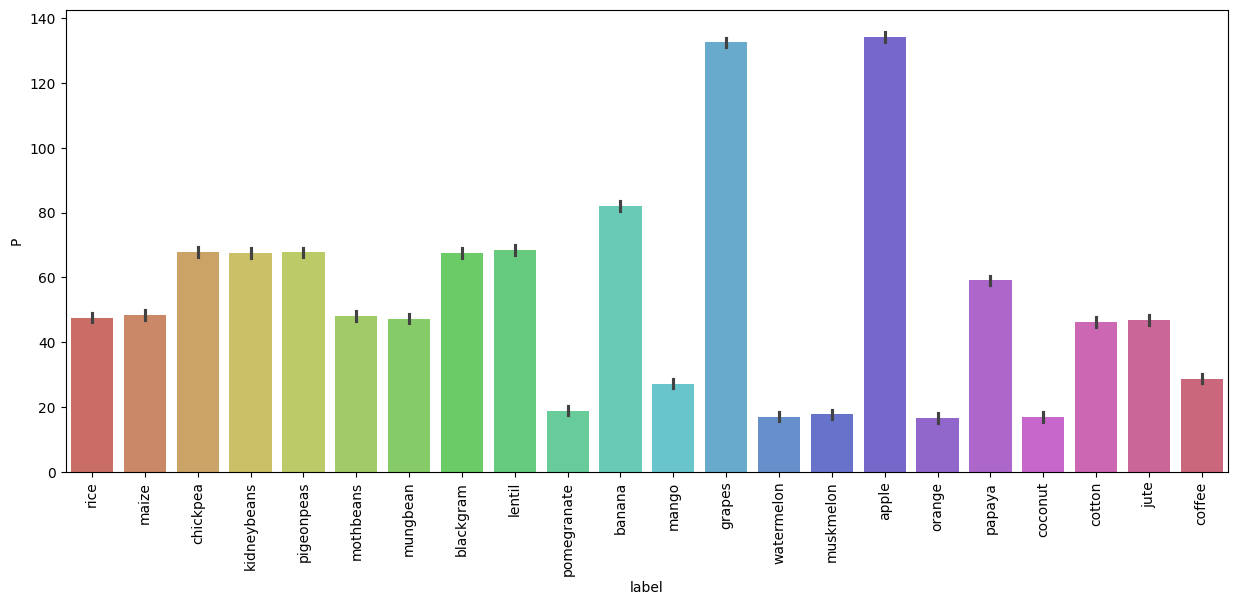

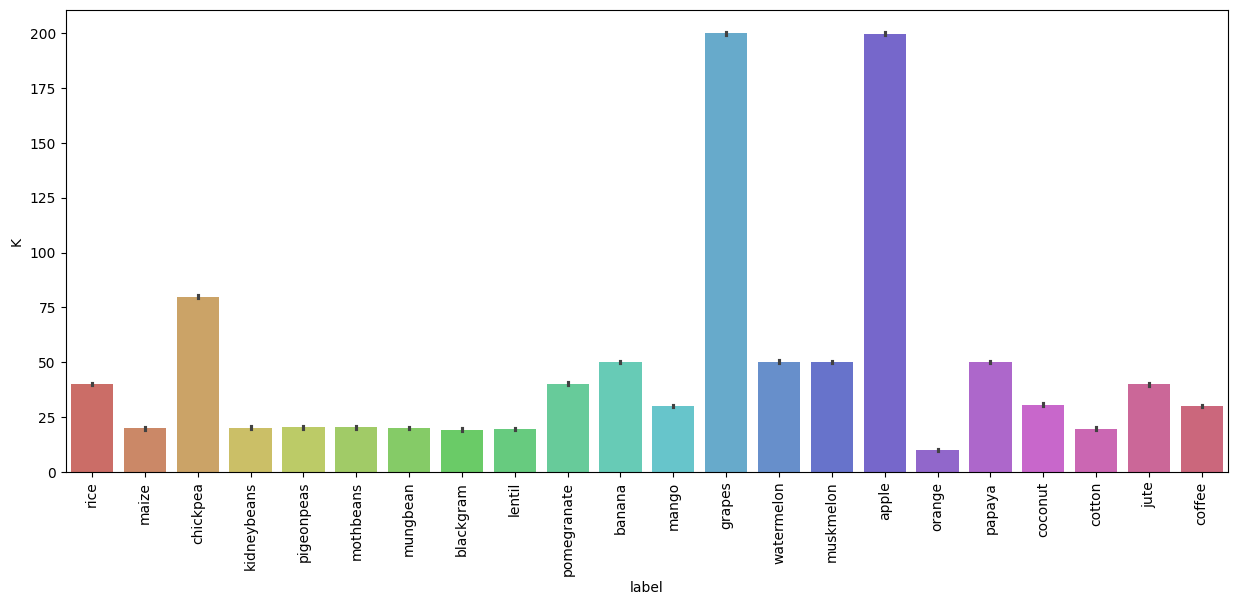

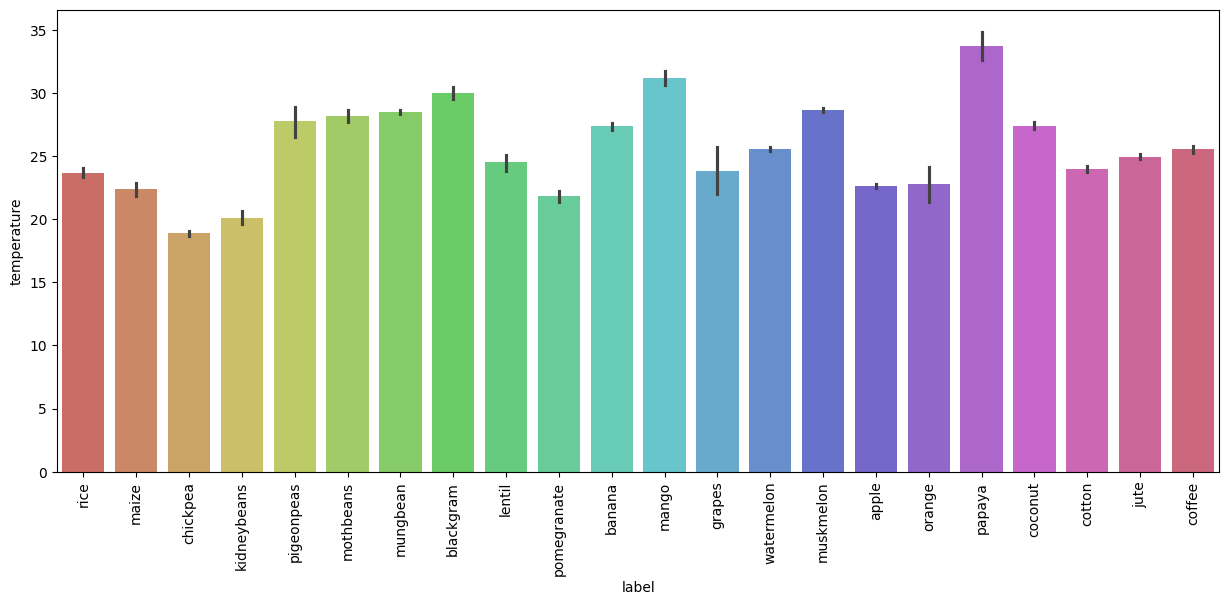

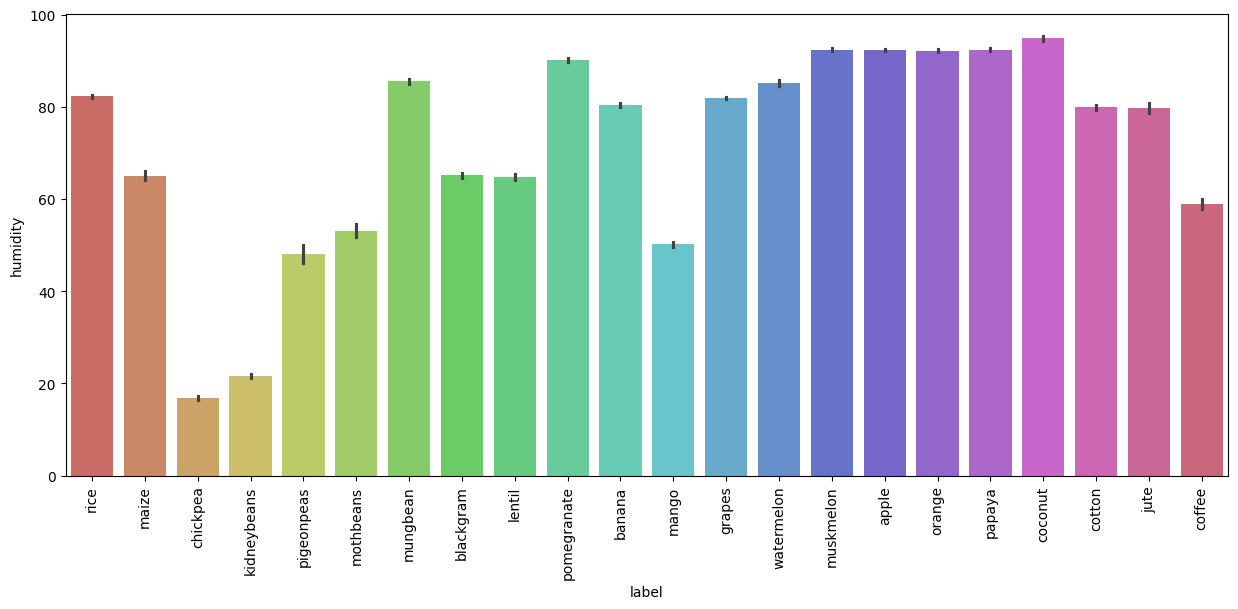

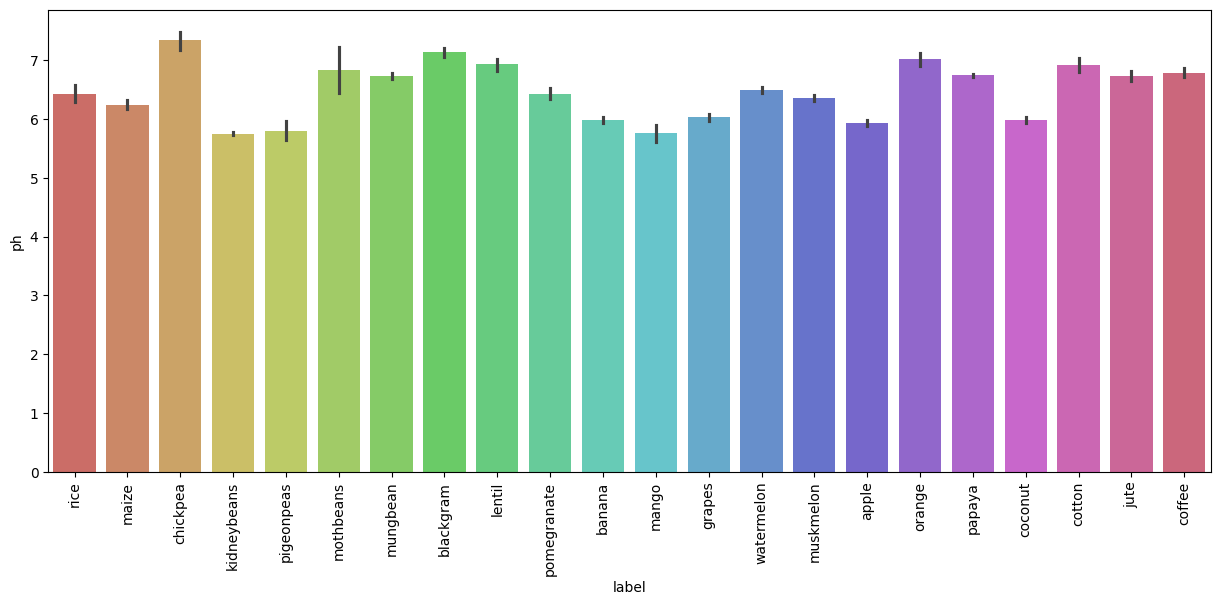

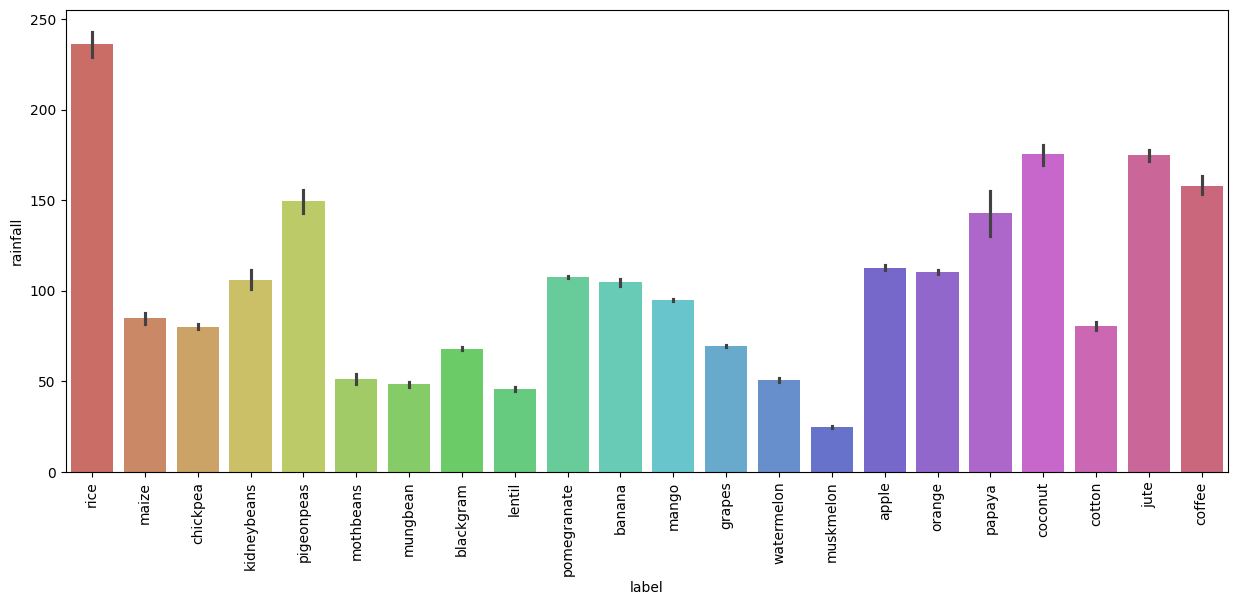

In [183]:
#bar-plots

for i in df.drop(columns='label', axis=1):
    plt.figure(figsize = (15,6))
    sns.barplot(x='label', y=i, data= df, palette='hls', hue='label')
    plt.xticks(rotation = 90)
    plt.show()

In [184]:
proper_name_mapping = {
    'rice': 'Rice',
    'maize': 'Maize (Corn)',
    'chickpea': 'Chickpea',
    'kidneybeans': 'Kidney Beans',
    'pigeonpeas': 'Pigeon Peas',
    'mothbeans': 'Moth Beans',
    'mungbean': 'Mung Bean',
    'blackgram': 'Black Gram',
    'lentil': 'Lentil',
    'pomegranate': 'Pomegranate',
    'banana': 'Banana',
    'mango': 'Mango',
    'grapes': 'Grapes',
    'watermelon': 'Watermelon',
    'muskmelon': 'Muskmelon',
    'apple': 'Apple',
    'orange': 'Orange',
    'papaya': 'Papaya',
    'coconut': 'Coconut',
    'cotton': 'Cotton',
    'jute': 'Jute',
    'coffee': 'Coffee'
}

df['label'] = df['label'].map(proper_name_mapping)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


<Axes: >

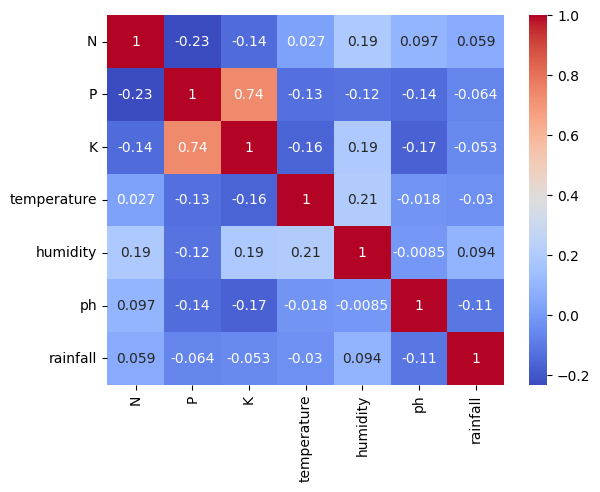

In [185]:

new_df = df[['N','P','K','temperature','humidity','ph','rainfall']]
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [186]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [187]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [188]:
acc = []
model = []

In [189]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

dt_predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, dt_predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(metrics.classification_report(Ytest,dt_predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
  Black Gram       0.59      1.00      0.74        16
    Chickpea       1.00      1.00      1.00        21
     Coconut       0.91      1.00      0.95        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.74      0.93      0.83        28
Kidney Beans       0.00      0.00      0.00        14
      Lentil       0.68      1.00      0.81        23
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
  Moth Beans       0.00      0.00      0.00        19
   Mung Bean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00   

In [190]:
# Cross validation score (Decision Tree)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)

In [191]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [192]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

gnb_predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, gnb_predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(metrics.classification_report(Ytest,gnb_predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
  Black Gram       1.00      1.00      1.00        16
    Chickpea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.88      1.00      0.93        28
Kidney Beans       1.00      1.00      1.00        14
      Lentil       1.00      1.00      1.00        23
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
  Moth Beans       1.00      1.00      1.00        19
   Mung Bean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00  

In [193]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [194]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(metrics.classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
  Black Gram       0.94      1.00      0.97        16
    Chickpea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.90      1.00      0.95        28
Kidney Beans       1.00      1.00      1.00        14
      Lentil       1.00      1.00      1.00        23
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
  Moth Beans       1.00      0.95      0.97        19
   Mung Bean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00 

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

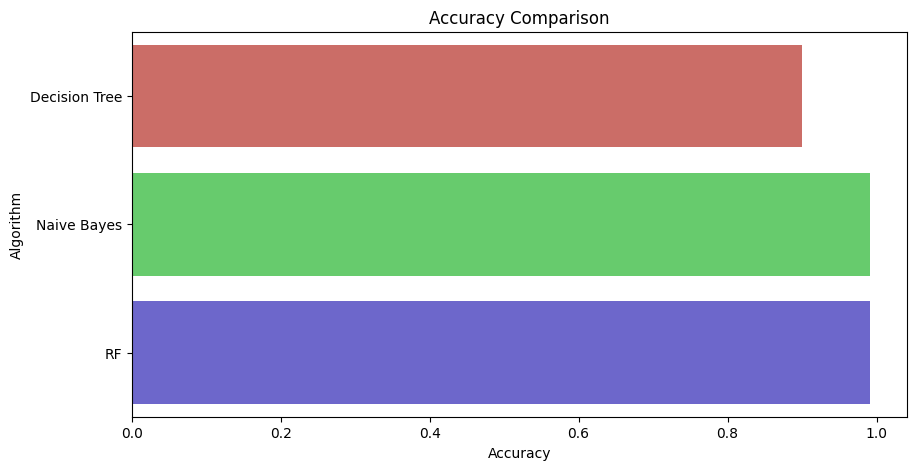

In [195]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='hls', hue=model)

In [196]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['Coffee']


In [197]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = DecisionTree.predict(data)
print(prediction)

['Coffee']


data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

In [198]:
data = np.array([[44.23467,0.00645, 102.29677, 31.29613, 48.53832, 4.31944 , 45.56276]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Watermelon']


In [199]:
data = np.array([[44.23467,0.00645, 102.29677, 31.29613, 48.53832, 4.31944 , 45.56276]])
prediction = RF.predict(data)
print(prediction)

['Chickpea']


In [200]:
data = np.array([[90,42	,43	,20.879744,	82.002744	,6.502985	,202.935536]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Rice']


Crop Yield Prediction

In [201]:
new_df = pd.read_csv('Crop_Yield_Prediction.csv')
crop_summary = pd.pivot_table(new_df, index="Crop",aggfunc="mean")

In [202]:
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [203]:
crop_summary = crop_summary.reset_index()

In [204]:
crop_summary

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


In [205]:
le = LabelEncoder()

In [206]:
crop_summary['Crop'] = le.fit_transform(crop_summary['Crop'])

In [207]:
crop_summary

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,0,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,1,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,2,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,3,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,4,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,5,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,6,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,7,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,8,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,9,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


In [208]:
#Splitting the dataset 
X = crop_summary[['Nitrogen','Phosphorus','Potassium','Rainfall','Temperature','pH_Value','Humidity','Crop']]
y = crop_summary['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

In [209]:
X

,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH_Value,Humidity,Crop
0,20.80,134.22,199.89,112.654779,22.630942,5.929663,92.333383,0
1,100.23,82.01,50.05,104.626980,27.376798,5.983893,80.358123,1
2,40.02,67.47,19.24,67.884151,29.973340,7.133952,65.118426,2
3,40.09,67.79,79.92,80.058977,18.872847,7.336957,16.860439,3
4,21.98,16.93,30.59,175.686646,27.409892,5.976562,94.844272,4
5,101.20,28.74,29.94,158.066295,25.540477,6.790308,58.869846,5
6,117.77,46.24,19.56,80.398043,23.988958,6.912675,79.843474,6
7,23.18,132.53,200.11,69.611829,23.849575,6.025937,81.875228,7
8,78.40,46.86,39.99,174.792798,24.958376,6.732778,79.639864,8
9,20.75,67.54,20.05,105.919778,20.115085,5.749411,21.605357,9


In [210]:
#model initialiation

lr_model = LinearRegression()
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Limit depth of each tree
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples in leaf nodes
    random_state=42
)

In [211]:
#model training - linear regression
lr_model.fit(X_train, y_train)


LinearRegression()

In [212]:
#model training - random forest regression
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [213]:
lr_pred = lr_model.predict(X_test)
lr_train_pred = lr_model.predict(X_train)

In [214]:
train_r2 = r2_score(y_train, lr_train_pred)

test_r2 = r2_score(y_test, lr_pred)

In [215]:
print(f"Training: {train_r2}")
print(f"Testing: {test_r2}")

Training: 0.49404357172413726
Testing: 0.6243744965669269


In [216]:
mse = mean_squared_error(lr_pred, y_test)

In [217]:
mse

np.float64(328275.76801155007)

In [218]:
rf_pred = rf_model.predict(X_test)
rf_train_pred = rf_model.predict(X_train)


In [219]:
rf_test_r2 = r2_score(y_test, rf_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)

In [220]:
print(f"Training: {rf_train_r2}")
print(f"Testing: {rf_test_r2}")

Training: 0.7080269194384858
Testing: 0.48790931538362936


In [221]:
rf_mse = mean_squared_error(rf_pred, y_test)
rf_mse

np.float64(447538.7353828917)

In [222]:
data = np.array([[20.80,	134.22	,199.89	,112.654779,	22.630942	,5.929663	,92.333383,0]])
prediction = lr_model.predict(data)
print(prediction)

[1983.60288741]
